![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

# Languages spoken in Canada : Part 2<br><br>Appreciation of the diversity of multilingualism<br><br>


Welcome to this Jupyter notebook. This notebook is a free resource provided by the Callysto project which aims to promote data science in the grade 5 to 12 classroom.

In this notebook, we will use Python to explore the different steps to data analysis, interpretation and visualization.

## Steps to analysing data
1. **ask a question** - formulate a question to research.
2. **select** - find a suitable data base as well as the necesasry Python libraries to answer the question.
3. **organise** - clean and organize the data to prepare yourself for the data analysis
4. **explore** - analyse the data and create data visualizations to represet the data
5. **interpret** - explain the observation made through the visualizations. 
6.  **communicate** - form a conclusion to your initial queston based on your observations.


## Question

**How do we understand multilingualism in Canada?**


## Selection

### Loading the libraries

In [1]:
# To create tables, import the pandas library under the label pd
import pandas as pd

# To manipulate numbers, import the numpy library under the label np
import numpy as np

# For the visualizations, import the plotly express library under the label px and the matplotlib library under the label plt
import plotly.express as px
import matplotlib.pyplot as plt

# For creating word clouds
from wordcloud import WordCloud

### Data sources

📕 

[Open Government Licence - Canada](https://ouvert.canada.ca/fr/licence-du-gouvernement-ouvert-canada)

Statistics Canada. (2023). census profile, 2021 census of populaiton. 
https://www12.statcan.gc.ca/census-recensement/2021/dp-pd/prof/index.cfm?Lang=F

Document connected to the census: https://www12.statcan.gc.ca/census-recensement/2021/dp-pd/prof/about-apropos/about-apropos.cfm?Lang=F

Statistics Canada. (2023). Population by knowledges of official languages and geography, 1951 to 2021. [Series issue ID 15100004].  https://ouvert.canada.ca/data/fr/dataset/ca075a79-5962-4fc0-9a51-7439f659ea62 
<br><br>

### Loading in the data

There are two sources of data

The first document `2021-langues-canada.csv` in the folder `data` reports the number of mother tongues , the languages that are spoken the most often at home, and the languages used at work in Canada in 2021. 

We will import the dataset in the variable `data_langues`.

In [2]:
data_langues = pd.read_csv("data/2021-langues-canada.csv")
data_langues

,QUESTION,LANGUE,FAMILLE,CLASSIFICATION,CHIFFRE_TOTAL
0,Langue maternelle,Anglais,indo-européenne,officielle,20107200.0
1,Langue maternelle,Français,indo-européenne,officielle,7189245.0
2,Langue maternelle,Pied-noir,algonquienne,autochtone,2520.0
3,Langue maternelle,Atikamekw,algonquienne,autochtone,5500.0
4,Langue maternelle,Ililimowin (cri de Moose),algonquienne,autochtone,155.0
...,...,...,...,...,...
798,Langue utilisée le plus souvent au travail,Français et anglais,indo-européenne,responses multiples,321975.0
799,Langue utilisée le plus souvent au travail,Anglais et langue(s) non officielle(s),multiples,responses multiples,115955.0
800,Langue utilisée le plus souvent au travail,Français et langue(s) non officielle(s),multiples,responses multiples,6280.0
801,Langue utilisée le plus souvent au travail,"Français, anglais et langue(s) non officielle(s)",multiples,responses multiples,7405.0


The dataset `data_langues` contains 803 rows and 5 columns, which makes 4015 points of data. 
<br><br>

<br><br>
The second file `1951-2021-langue-maternelle.csv` in the folder `data ` gives the figure of mother languages in Canada, in the provinces, and in the territories between 1951 and 2021. 

We will load the dataset in the variable `data_langue_maternelle_periode`.

In [3]:
data_langue_maternelle_periode = pd.read_csv("data/1951-2021-langue-maternelle.csv")
data_langue_maternelle_periode

,PÉRIODE DE RÉFÉRENCE,GÉO,DGUID,Langue maternelle,Statistiques,Réponses multiples,UNITÉ DE MESURE,IDENTIFICATEUR D'UNITÉ DE MESURE,FACTEUR SCALAIRE,IDENTIFICATEUR SCALAIRE,VECTEUR,COORDONNÉES,VALEUR,STATUS,SYMBOLE,TERMINÉ,DÉCIMALES
0,1951,Canada,2016A000011124,"Total, langue maternelle",Nombre,Réparties,Nombre,223,unités,0,v1563943326,1.1.1.2,14009429.0,NaN,NaN,NaN,0
1,1951,Canada,2016A000011124,"Total, langue maternelle",Pourcentage,Réparties,Pourcent,239,unités,0,v1563943328,1.1.2.2,100.0,NaN,NaN,NaN,1
2,1951,Canada,2016A000011124,Français,Nombre,Réparties,Nombre,223,unités,0,v1563943330,1.2.1.2,4068850.0,NaN,NaN,NaN,0
3,1951,Canada,2016A000011124,Français,Pourcentage,Réparties,Pourcent,239,unités,0,v1563943332,1.2.2.2,29.0,NaN,NaN,NaN,1
4,1951,Canada,2016A000011124,Anglais,Nombre,Réparties,Nombre,223,unités,0,v1563943334,1.3.1.2,8280809.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2021,Canada hors Québec,NaN,Anglais et langue(s) non officielle(s),Pourcentage,Non réparties,Pourcent,239,unités,0,v1563943704,16.6.2.1,3.1,NaN,NaN,NaN,1
2916,2021,Canada hors Québec,NaN,Français et langue(s) non officielle(s),Nombre,Non réparties,Nombre,223,unités,0,v1563943705,16.7.1.1,23710.0,NaN,NaN,NaN,0
2917,2021,Canada hors Québec,NaN,Français et langue(s) non officielle(s),Pourcentage,Non réparties,Pourcent,239,unités,0,v1563943706,16.7.2.1,0.1,NaN,NaN,NaN,1
2918,2021,Canada hors Québec,NaN,"Français, anglais et langue(s) non officielle(s)",Nombre,Non réparties,Nombre,223,unités,0,v1563943707,16.8.1.1,24195.0,NaN,NaN,NaN,0


The dataset `data_langue_maternelle_periode` is made of 2920 rows and 17 columns, which makes up about 49 000 data points as 'NaN' fills several cells and columns. 'NaN' means *Not a Number* and indicates that the cell is empty. We will need to clean this data in the next step: organizing. 
<br><br>

## Organize

Let's return to the research question of how do we understand multilingualism. We will have to identify and understant the variables that are relavent in order to organize and explore the data. 

To get more information on the variables related to language, check the  [langauge reference guide, census of population, 2021](https://www12.statcan.gc.ca/census-recensement/2021/ref/98-500/003/98-500-x2021003-eng.cfm).


### A note on the language data and the dataset

Here are the questions relavent to our research that have been posed during the 2021 census :

>The question regarding **mother tongue** is the following:
>
>What is the language that this person first learned at home in childhood and still understands?
>
>The quesrion regarding the languages spoken **at home** was divided into two parts:
>a)What language(s) does this person speak on a regular basis at home?
>b) Of these languages, which one does this person speak most often at home?
>
>The question regarding the language spoken **at work** was divided into two parts:
>
>a) In this job, what language(s) did this person use on a regular basis?
>b) Of these languages, which one did this person use most often in this job?

### The `data_langues` dataset

#### The mother tongue subset `df_langue_maternelle`

In [4]:
df_langue_maternelle = data_langues.loc[data_langues["QUESTION"] == "Langue maternelle"]
df_langue_maternelle = df_langue_maternelle.sort_values("LANGUE", ascending=True)

#### The home language subset `df_langue_maison`

In [5]:
df_langue_maison = data_langues.loc[lambda df: (df["QUESTION"]=="Langue parlée le plus souvent à la maison")]; 
df_langue_maison = df_langue_maison.sort_values("LANGUE", ascending=True)

##The work language subset `df_langue_travail`

In [6]:
df_langue_travail = data_langues.loc[lambda df: (df["QUESTION"]=="Langue utilisée le plus souvent au travail")];
df_langue_travail = df_langue_travail.sort_values("LANGUE", ascending=True)

#### The langauge table subset `langues_tableau`

In [7]:
reorg = data_langues.pivot_table(index=[data_langues.index, "LANGUE"], values="CHIFFRE_TOTAL", columns="QUESTION")
langues_tableau = reorg.groupby(["LANGUE"], as_index=True).first()
langues_tableau.reset_index(inplace=True)

### The mother tongue period data set `data_langue_maternelle_periode`

#### The subset for the mother tongue period `df_langue_maternelle_periode`

In [8]:
df_langue_maternelle_periode = data_langue_maternelle_periode.drop(columns=["DGUID", "Réponses multiples", "UNITÉ DE MESURE", "IDENTIFICATEUR D'UNITÉ DE MESURE", "FACTEUR SCALAIRE", "IDENTIFICATEUR SCALAIRE", "VECTEUR", "COORDONNÉES", "STATUS", "SYMBOLE", "TERMINÉ", "DÉCIMALES"])
df_pourcent_maternelle_periode = df_langue_maternelle_periode.loc[df_langue_maternelle_periode["Statistiques"] == "Pourcentage"]
df_langue_maternelle_reorg = df_pourcent_maternelle_periode[df_pourcent_maternelle_periode["Langue maternelle"].str.contains("Total") == False]

## Explore

📕 We will begin the exploration by visualizing all the data points. Let's create a word cloud that represents all the figures related to each language by changing the size of the word of the language to correspond with its total number. 


In [9]:
# define the variable 'texte'
texte = df_langue_maternelle.set_index("LANGUE")["CHIFFRE_TOTAL"].to_dict() # Changer le sous-ensemble de données :  df_langue_maternelle, df_langue_maison, ou df_langue_travail

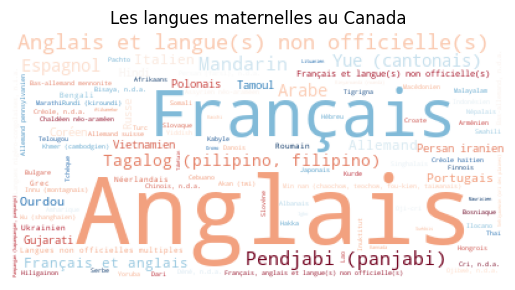

In [10]:
wc = WordCloud(background_color="white", # define the colour of the background image
               colormap="RdBu",# specify the other colours such as "OrRd","autumn","copper","gist_heat","hot","Reds","rainbow"
              ) 
wc.fit_words(texte) # display the words of the variable `texte`
plt.imshow(wc) # add the colours
plt.axis("off") # turn off the axis
plt.title("Les langues maternelles au Canada") # define the title
plt.show() # display the word cloud

🔎 How is biligualism represented? What about multilingualism? 

📕 We will choose another visualization, a bar graph, to see the frequencies of the variable `LANGUE`. 

Sometimes, the languages contain abbreviations :
n.i.a. = not included elsewhere (non inclus ailleurs)
<br>n.d.a. = not declared elsewhere (non déclaré ailleurs)

In [11]:
# define the variable langue_maternelle_bandes as a bar graph with the x axis LANGUE
langue_maternelle_bandes = px.bar(df_langue_maternelle, x="LANGUE", y="CHIFFRE_TOTAL", color="LANGUE", title=" ", color_discrete_sequence=px.colors.diverging.Portland)

# Display the bar graph in decreasing order
langue_maternelle_bandes.update_layout(xaxis={"categoryorder":"total descending"})

# Display the bar graph
langue_maternelle_bandes.update_layout(autosize=True, height=800)

🔎 In the code of this graph, we indicated the x and y variables. What does the y v variable represent? 

Consider the height of the bars. Check the official languages off by deselecting `Anglais` and `Français` in the legend. You can also zoom by selecting the tool in the menu and reset the x-axis by clicking on the house menu item.

🔎 Do you notice any drastic differences in the frequencies? What divides the data? Is there an explanation to the division?

🔎 What title would you give this graph? What does your title signify?

📕 We will continue the exploration with a bar graph with the frequencies of the variable `LANGUE` in the subset `df_langue_maison`.

In [12]:
langue_maison_bandes = px.bar(df_langue_maison, x="LANGUE", y="CHIFFRE_TOTAL", color="LANGUE", title=" ", color_discrete_sequence=px.colors.diverging.Portland)
langue_maison_bandes.update_layout(xaxis={"categoryorder":"total descending"}) 
langue_maison_bandes.update_layout(autosize=True, height=800)

🔎 What is the difference between English as a mother tongue in the first bar graph that we explored and English spoken at home in this bar graph? 

🔎 What are the differences for the other languages? Can you come up with reasons why the numbers for mother tongues and languages spoken at home are different? 

🔎 What title would you give this graph? What does your title signify?

📕 Next, we will explore the bar graph for the frequencies of the `LANGUE` variable in the subset `df_langue_travail`.

In [13]:
langue_travail_bandes = px.bar(df_langue_travail, x="LANGUE", y="CHIFFRE_TOTAL", title=" ", color="LANGUE", color_discrete_sequence=px.colors.diverging.Portland)
langue_travail_bandes.update_layout(xaxis={"categoryorder":"total descending"})
langue_travail_bandes.update_layout(autosize=True, height=800)

Compare the x-axis in each of the three graphs. Each graph shows the languages in decreasing order of frequencies.

🔎 Do you think it is useful to place all the languages on the x-axis? How does the interactivity of the graph affect your interpretation of the graph?

📕 We can also explore the relationship between two variables of language. The scatter plot below shows the mother tongue on the x-axis and the language spoken most often at home on the y-axis. The interactive legend shows a list of all the langauges.

In [14]:
# Define the variable langue_maternelle_maison as a scatter plot diagram with the x axis as the language spoken most often at home and the y axis as the mother tongue. 
langue_maternelle_maison = px.scatter(langues_tableau, x="Langue parlée le plus souvent à la maison", y="Langue maternelle", color="LANGUE", color_discrete_sequence=px.colors.diverging.Portland, title=" ")

# Display the scatter plot
langue_maternelle_maison.show()

📕 Examine the dispersion of the points. To select and deselct languages, click on the language in the legend. Plaec your mouse pointer on a certain point to see its details. You can also zoom in on a certain selection with the zoom in tool and reset your x-axis by click in on the house. 

🔎 Is the langauge spoken the most often at home correlated with mother tongue? Is the relationship between the two linear or non-linear? Is it a postive or nagative relationship?

🔎 Which three points on the graph have extreme values? Why do you think they are so expreme?

🔎 Why do you think the other languages are bunched up together? Which languages have a higher mother tongue value than their value for language spoken most often at home? Hint: zoom in close to the origin (0,0) and placec your mouse pointer on the points to see their details.

📕 Let's explore the dependency of mother tongues, places on the y-axis, with the langauge spoken most often at home, on the x-axis, in the next scatter plot.

In [15]:
langue_maternelle_travail = px.scatter(langues_tableau, x="Langue utilisée le plus souvent au travail", y="Langue maternelle", color="LANGUE", color_discrete_sequence=px.colors.diverging.Portland, title=" ")
langue_maternelle_travail.show()

🔎 Is the language spoken ost often at work the same as the mother tongue? Is the relationship linear or non-linear? Is it a positive or negative relationship. 

🔎 Which three points have extreme values? Why do you think they have extreme values?

🔎 Why do you think the other langauges are bunched up together? Which language points have higher values as mother tongues than langauges spoken most often at home?

## Interpret

🔎 What are the similarities and differences betwenn the two scatter plots? 

🔎 What are some short and long term impacts based on the relationship between the variables? 

🔎 What does this say about individuad and collective responsibilites?

## Explore

📕 The treemaps below are interactive. Click on the rectangles to zoom in and explore. The boxes represent the hierarchy of the categories and the proportion of numbers of each langauge. 

In [16]:
# Define the variable langue_maternelle_classification with more specific titles for the language categories
langue_maternelle_classification = df_langue_maternelle.replace(["officielle", "autochtone", "non officielle", "responses multiples"], ["Langues officielles", "Langues autochtones", "Langues non officielles", "Réponses multiples"])

# Define the variable langues_maternelle_treemap as a treemao with the CLASSIFICATION and LANGUE paths
langues_maternelle_treemap = px.treemap(langue_maternelle_classification, path=[px.Constant("<b>Langues maternelles au Canada</b>"), "CLASSIFICATION", "LANGUE"], values="CHIFFRE_TOTAL",
                  color="LANGUE", color_discrete_sequence=px.colors.diverging.Portland, hover_data=["CHIFFRE_TOTAL"])

# display the treemap
langues_maternelle_treemap.show()

🔎 Where are the four classifications located?: Official languages, non official languages, Aboriginal languages, and multiple responses?

In [17]:
langue_maison_classification = df_langue_maison.replace(["officielle", "autochtone", "non officielle", "responses multiples"], ["Langues officielles", "Langues autochtones", "Langues non officielles", "Réponses multiples"])
langues_maison_treemap = px.treemap(langue_maison_classification, path=[px.Constant("<b>Langues parlées le plus souvent à la maison au Canada</b>"), "CLASSIFICATION", "LANGUE"], values="CHIFFRE_TOTAL",
                  color="LANGUE", color_discrete_sequence=px.colors.diverging.Portland, hover_data=["CHIFFRE_TOTAL"])
langues_maison_treemap.show()

🔎 Where are the four classifications located?: Official languages, non official languages, Aboriginal languages, and multiple responses?

In [18]:
langue_travail_classification = df_langue_travail.replace(["officielle", "autochtone", "non officielle", "responses multiples"], ["Langues officielles", "Langues autochtones", "Langues non officielles", "Réponses multiples"])
langues_travail_treemap = px.treemap(langue_travail_classification, path=[px.Constant("<b>Langues utilisées le plus souvent au travail au Canada</b>"), "CLASSIFICATION", "LANGUE"], values="CHIFFRE_TOTAL",
                  color="LANGUE", color_discrete_sequence=px.colors.diverging.Portland, hover_data=["CHIFFRE_TOTAL"])
langues_travail_treemap.show()

🔎 Where are the four classifications located?: Official languages, non official languages, Aboriginal languages, and multiple responses?

## Interpret

🔎 What differences do you see in the classifications of the languages (official langauges, non official languages, Aboriginal languages, and multiple responses) between the three treemaps? What could explain these differences?

🔎 Are the variables that have no difference between the three treemaps?

## Explore

We will see how the use of langauge depends on the context. We will explore the percentage of mother tongues declraed every year betwen 1951 and 2021 in the line graph below. 

The classifications and in the legend: 
- French
- English
- non official languages including Aboriginal languages
- French and English
- English and a non official language
- French and a non official language
- French, English, and a non official language

The y axis represents the percentage and the x axis represents the year

In [19]:
# Define the subset df_geo for Canada
df_geo = df_langue_maternelle_reorg.loc[lambda df: (df["GÉO"]=="Canada")];

# Define the variable langue_maternelle_lignes as a line graph with the y as VALEUR and the colors of the Langue maternelle variables
langue_maternelle_lignes = px.line(df_geo, x="PÉRIODE DE RÉFÉRENCE", y="VALEUR", color="Langue maternelle", color_discrete_sequence=px.colors.diverging.Portland, title="Langues maternelles au Canada entre 1951 et 2021")

# display the line graph
langue_maternelle_lignes.show()

🔎 Which langauges began to be represented in 1991 when more choices have been added to the census questions? 

## Interpret

🔎 Which categorie of mother tongue language has an increasing trend even with the addition of the extra responses in 1991?

## Communicate

🔎 How does the exploration of the census data  help you in discoveiring what bilingualism and multilingualism mean? 

🔎 In your opinion, which results have the most impact? Explain.

🔎 Do you have your own questions about multilingualism? What ar eyour questions? What kind of data could help you answer your questions?

# La fin

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)